- https://www.kaggle.com/code/arthurtok/feature-ranking-rfe-random-forest-linear-models
- https://www.kaggle.com/code/burhanykiyakoglu/predicting-house-prices
- https://www.kaggle.com/code/caesarmario/house-price-w-linear-ridge-regression

# 01. Bibliotecas:

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from yellowbrick.regressor import ResidualsPlot 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve

# 02. Lendo arquivo:

In [35]:
arquivo = 'kc_house_data.csv'
base = pd.read_csv(arquivo)
base = base.drop(['id', 'date'],axis=1)

<i><b> 5 primeiras linhas: </b></i>

In [36]:
base.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<i><b> 5 primeiras últimas: </b></i>

In [37]:
base.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


# 03. Análise exploratória:

In [38]:
print("O DataFrame possui {} linhas e {} colunas.".format(base.shape[0], base.shape[1]))

O DataFrame possui 21613 linhas e 19 colunas.


In [39]:
print(f"Contando o número de duplicatas: {base.duplicated().sum()}")

Contando o número de duplicatas: 5


In [40]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [41]:
base.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [42]:
base.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


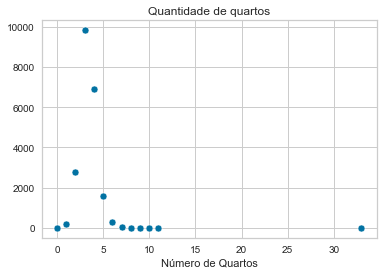

De acordo com os dados disponíveis, 80% dos imóveis possuem até 3 quartos, onde 3 é o menor número de quartos que representa essa porcentagem. O maior número de quartos observado é 3, enquanto o menor número de quartos é 11. O maior número de quartos disponível na base de dados é 33.


In [43]:
bedrooms = base['bedrooms'].value_counts()

# Plotting
sns.scatterplot(x=bedrooms.index, y=bedrooms.values).set(title='Quantidade de quartos')
plt.xlabel('Número de Quartos')
plt.show()

# Calculando o Pareto
total_imoveis = len(base)
pareto = bedrooms.sort_index().cumsum() / total_imoveis * 100

# Encontrando o menor número de quartos que representa 80% dos imóveis
quartos_80_percent = pareto[pareto <= 80].index.max()

# Obtendo os maiores e menores valores (outliers)
maior_valor = bedrooms.idxmax()
menor_valor = bedrooms.idxmin()

# Encontrando o maior quarto disponível
maior_quarto = base['bedrooms'].max()

# Imprimindo a informação com destaque para os maiores e menores valores
print("De acordo com os dados disponíveis, 80% dos imóveis possuem até {} quartos, onde {} é o menor número de quartos que representa essa porcentagem. O maior número de quartos observado é {}, enquanto o menor número de quartos é {}. O maior número de quartos disponível na base de dados é {}.".format(quartos_80_percent, quartos_80_percent, maior_valor, menor_valor, maior_quarto))


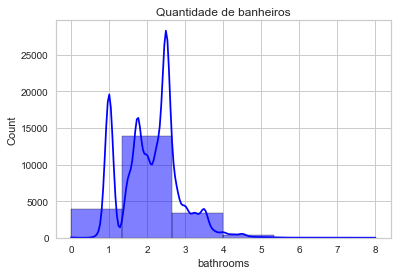

De acordo com os dados disponíveis, 80% dos imóveis possuem até 2.0 banheiros, onde 2.0 é o menor número de banheiros que representa essa porcentagem. O maior número de banheiros observado é 8.0, enquanto o menor número de banheiros é 0.0. O maior número de banheiros disponível na base de dados é 8.0.


In [44]:
# Plotando o histograma
sns.histplot(base['bathrooms'], kde=True, bins=6, color='blue').set(title='Quantidade de banheiros')
plt.show()

# Calculando o Pareto
total_imoveis = len(base)
pareto = base['bathrooms'].value_counts().sort_index().cumsum() / total_imoveis * 100

# Encontrando o menor número de banheiros que representa 80% dos imóveis
banheiros_80_percent = pareto[pareto <= 80].index.max()

# Obtendo os maiores e menores valores (outliers)
maior_valor = base['bathrooms'].max()
menor_valor = base['bathrooms'].min()

# Arredondando os valores
banheiros_80_percent = round(banheiros_80_percent, 0)
maior_valor = round(maior_valor, 0)
menor_valor = round(menor_valor, 0)

# Imprimindo a informação com destaque para os maiores e menores valores
print("De acordo com os dados disponíveis, 80% dos imóveis possuem até {} banheiros, onde {} é o menor número de banheiros que representa essa porcentagem. O maior número de banheiros observado é {}, enquanto o menor número de banheiros é {}. O maior número de banheiros disponível na base de dados é {}.".format(banheiros_80_percent, banheiros_80_percent, maior_valor, menor_valor, maior_valor))

[Text(0.5, 1.0, 'Metragem quadrada do espaço interior dos apartamentos')]

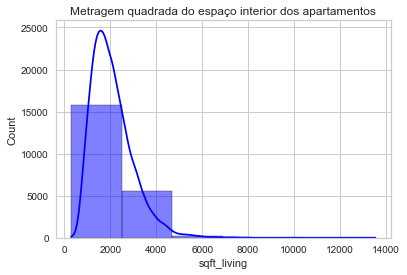

In [45]:
sns.histplot(base['sqft_living'], kde=True, bins=6, color='blue').set(title='Metragem quadrada do espaço interior dos apartamentos')

-<i> No gráfico acima, observamos que o histograma apresenta uma <b>Cauda Longa</b> à Esquerda. <i>

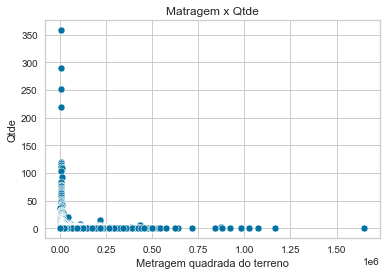

In [46]:
sqft_lot = base['sqft_lot'].value_counts()

# Plotting
sns.scatterplot(y=sqft_lot.values, x=sqft_lot.index).set(title='Matragem x Qtde')
plt.xlabel('Metragem quadrada do terreno')
plt.ylabel('Qtde')
plt.show()

[Text(0.5, 1.0, 'floors')]

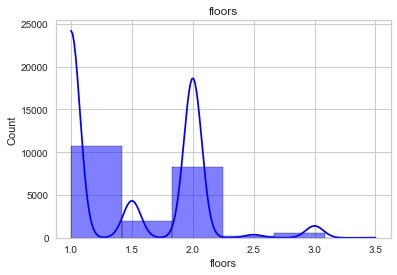

In [47]:
#floors
sns.histplot(base['floors'], kde=True, bins=6, color='blue').set(title='floors')

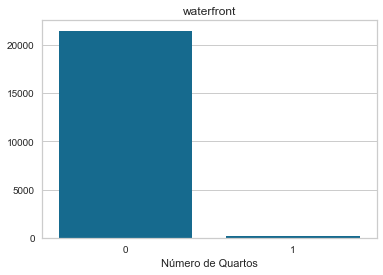

In [48]:
#waterfront
waterfront = base['waterfront'].value_counts()

# Plotting
sns.barplot(x=waterfront.index, y=waterfront.values).set(title='waterfront')
plt.xlabel('Número de Quartos')
plt.show()

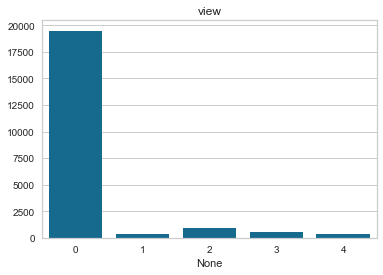

In [49]:
#view
view = base['view'].value_counts()

# Plotting
sns.barplot(x=view.index, y=view.values).set(title='view')
plt.show()

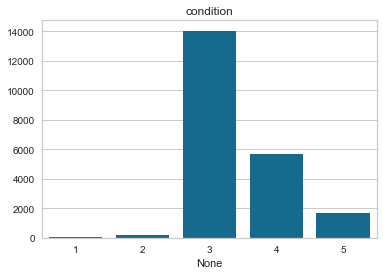

In [50]:
#view
condition = base['condition'].value_counts()

# Plotting
sns.barplot(x=condition.index, y=condition.values).set(title='condition')
plt.show()

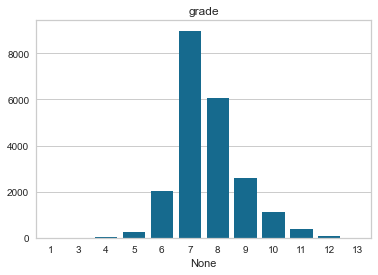

In [51]:
#view
grade = base['grade'].value_counts()

# Plotting
sns.barplot(x=grade.index, y=grade.values).set(title='grade')
plt.show()

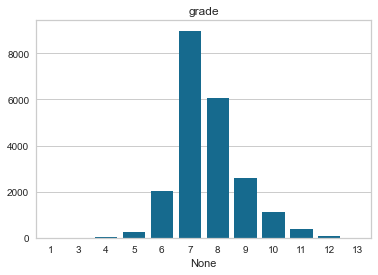

In [52]:
#view
grade = base['grade'].value_counts()

# Plotting
sns.barplot(x=grade.index, y=grade.values).set(title='grade')
plt.show()

[Text(0.5, 1.0, 'sqft_above')]

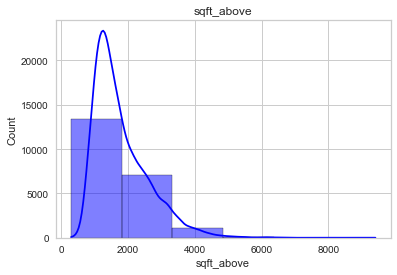

In [53]:
sns.histplot(base['sqft_above'], kde=True, bins=6, color='blue').set(title='sqft_above')

[Text(0.5, 1.0, 'sqft_basement')]

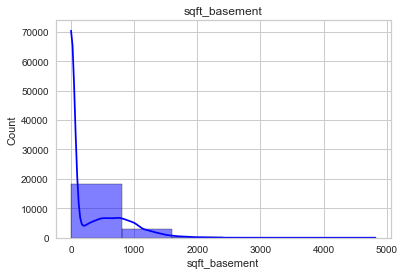

In [54]:
sns.histplot(base['sqft_basement'], kde=True, bins=6, color='blue').set(title='sqft_basement')

[Text(0.5, 1.0, 'yr_built')]

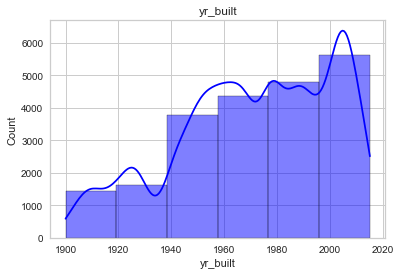

In [55]:
sns.histplot(base['yr_built'], kde=True, bins=6, color='blue').set(title='yr_built')

[Text(0.5, 1.0, 'yr_renovated')]

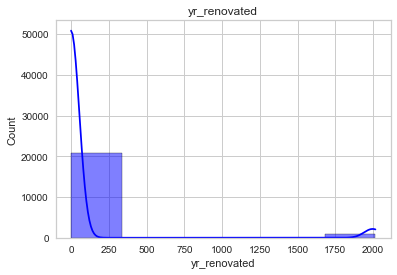

In [56]:
sns.histplot(base['yr_renovated'], kde=True, bins=6, color='blue').set(title='yr_renovated')

[Text(0.5, 1.0, 'sqft_living15')]

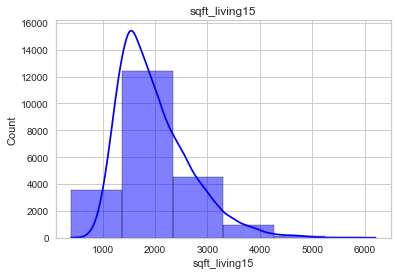

In [57]:
sns.histplot(base['sqft_living15'], kde=True, bins=6, color='blue').set(title='sqft_living15')

[Text(0.5, 1.0, 'sqft_lot15')]

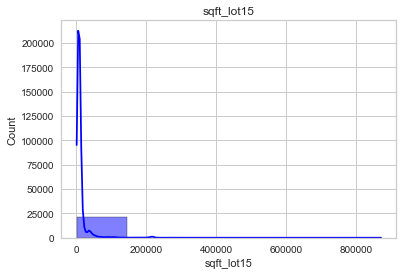

In [58]:
sns.histplot(base['sqft_lot15'], kde=True, bins=6, color='blue').set(title='sqft_lot15')

In [59]:
base.columns
df = base[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built','zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

<Axes: >

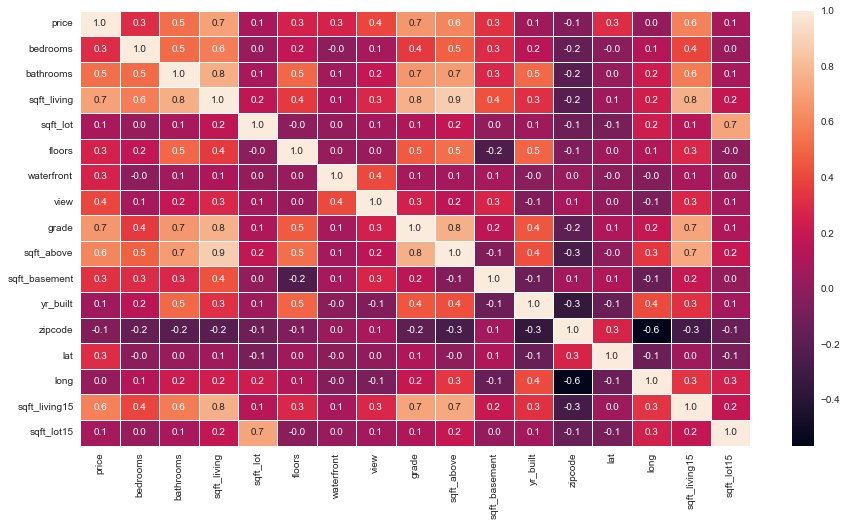

In [60]:
correlation = df.corr()
# Ajustar o tamanho da figura
plt.figure(figsize=(15, 8))  # Ajuste a largura e altura conforme necessário

# Criar o heatmap
plot = sns.heatmap(correlation, annot=True, fmt=".1f", linewidths=.6)

#plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [61]:
X=df.drop('price', axis=1).values
y=df['price'].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)

print(f"Visualização dos coeficientes: {model.intercept_}")
print(f"Visualização da inclinação da reta: {model.coef_}")
print(f"O Modelo possui um Coeficiente R^2 de: {score:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {round(mse,2)}')

Visualização dos coeficientes: 11823452.39635449
Visualização da inclinação da reta: [-3.40239152e+04  4.83754588e+04  1.09812692e+02  7.76652415e-02
  5.64453316e+03  5.66889853e+05  5.42473899e+04  9.55004552e+04
  6.85442105e+01  4.12684812e+01 -2.99742405e+03 -5.90735482e+02
  5.88394854e+05 -1.91760209e+05  1.89779152e+01 -3.10659370e-01]
O Modelo possui um Coeficiente R^2 de: 0.70
Mean Squared Error: 45540516885.94


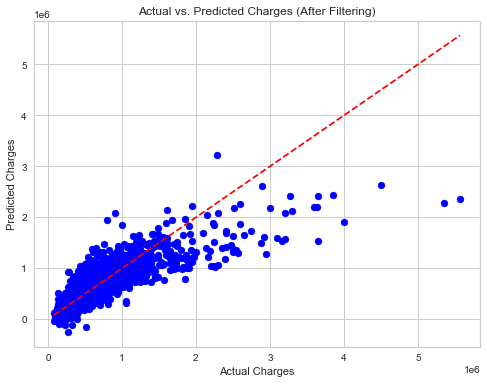

In [63]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (After Filtering)')
plt.grid(True)
plt.show()

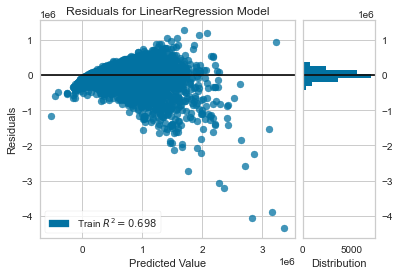

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [64]:
visualizador = ResidualsPlot(model)
visualizador.fit(X, y)
visualizador.poof()

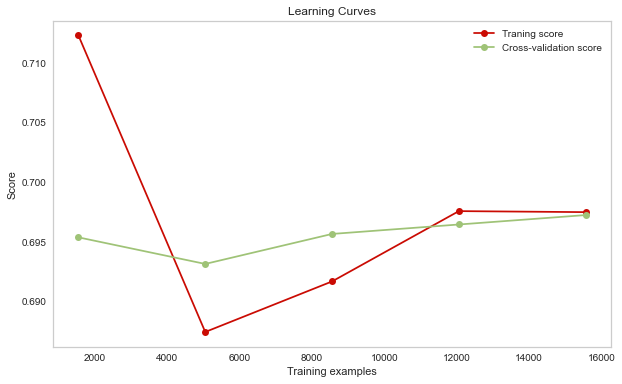

In [65]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Traning score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()